# Extended Data Figure 6: Persistence across dimensions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from persim import plot_diagrams

In [2]:
data = pd.read_hdf("../data/EDFigure6.h5") #TODO: rename this file to be 6.

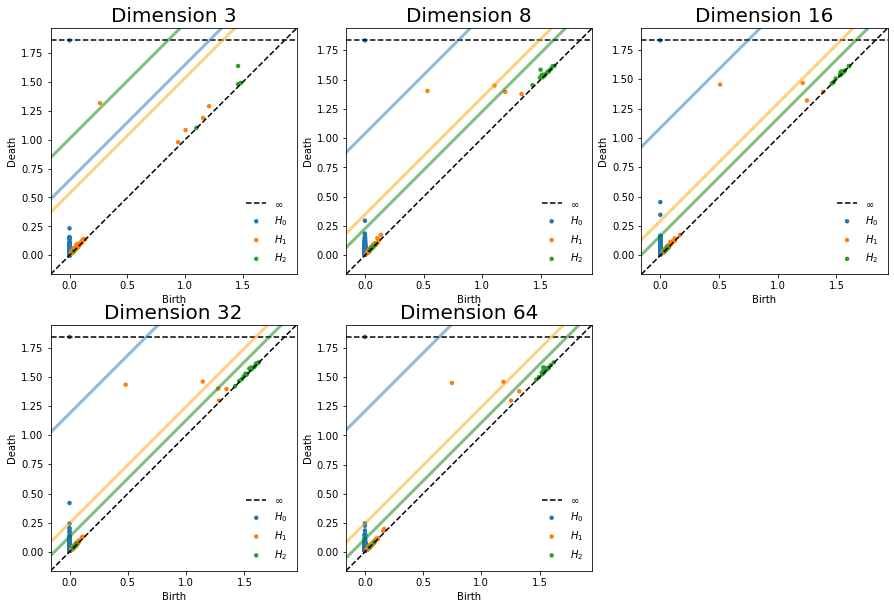

In [3]:
behavior_topology = data["behavior"]
max_dims_behavior = data["shuffled-max"]
dims = [3, 8, 16, 32, 64]
plt.figure(figsize=(15, 10))
for i, d in enumerate(dims):
    ax = plt.subplot(2, 3, i + 1)
    ax.set_title(f"Dimension {d}", fontsize=20)
    plot_diagrams(behavior_topology[d]["dgms"])
    plt.plot(
        [
            -0.5,
            2,
        ],
        [-0.5 + max_dims_behavior[d][0], 2 + max_dims_behavior[d][0]],
        color="C0",
        linewidth=3,
        alpha=0.5,
    )
    plt.plot(
        [
            -0.5,
            2,
        ],
        [-0.5 + max_dims_behavior[d][1], 2 + max_dims_behavior[d][1]],
        color="orange",
        linewidth=3,
        alpha=0.5,
    )
    plt.plot(
        [-0.50, 2],
        [-0.5 + max_dims_behavior[d][2], 2 + max_dims_behavior[d][2]],
        color="green",
        linewidth=3,
        alpha=0.5,
    )
    betti_1 = (
        (behavior_topology[d]["dgms"][0][:, 1] - behavior_topology[d]["dgms"][0][:, 0])
        > max_dims_behavior[d][0]
    ).sum()
    betti_2 = (
        (behavior_topology[d]["dgms"][1][:, 1] - behavior_topology[d]["dgms"][1][:, 0])
        > max_dims_behavior[d][1]
    ).sum()
    betti_3 = (
        (behavior_topology[d]["dgms"][2][:, 1] - behavior_topology[d]["dgms"][2][:, 0])
        > max_dims_behavior[d][2]
    ).sum()
    plt.legend(frameon=False)